<a href="https://colab.research.google.com/github/saira83/incom_inequality/blob/main/incom_inequality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load the data with pandas
df = pd.read_csv('/content/data.csv')

In [5]:
# basic seven questions that we try to find the answer about data.
# 1: how big is the data
# 2: how does the data looks like?
# 3: what is the data type of each column
# 4: are there any missing values?
# 5: how does the data looks mathematically?
# 6: are there duplicate values?
# 7:

In [6]:
#how big is the data?
df.shape

(38613, 43)

In [7]:
# how does the data looks like?
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [8]:
# we can use the sample function  rather than head()
df.sample(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
9456,ID_TZ107617,46,Female,Associates degree-occup /vocational,Private,NaN,Divorced,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1113.63,Below limit
16633,ID_TZ114083,42,Female,High school graduate,NaN,NaN,Never married,White,Puerto Rican,Not in labor force,...,Puerto-Rico,?,?,?,?,NaN,NaN,NaN,1107.00,Below limit
7201,ID_TZ105586,50,Female,High school graduate,Private,NaN,Widowed,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1953.91,Below limit
23496,ID_TZ120266,24,Male,Bachelors degree(BA AB BS),Private,College or university,Never married,Black,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1645.49,Below limit
26499,ID_TZ122971,64,Female,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2884.17,Below limit


In [9]:
# what is the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38613 entries, 0 to 38612
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              38613 non-null  object 
 1   age                             38613 non-null  int64  
 2   gender                          38613 non-null  object 
 3   education                       38613 non-null  object 
 4   class                           19245 non-null  object 
 5   education_institute             2426 non-null   object 
 6   marital_status                  38613 non-null  object 
 7   race                            38613 non-null  object 
 8   is_hispanic                     38613 non-null  object 
 9   employment_commitment           38613 non-null  object 
 10  unemployment_reason             1188 non-null   object 
 11  employment_stat                 38613 non-null  int64  
 12  wage_per_hour                   

In [10]:
# are there any missing values?
df.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             19368
education_institute               36187
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason               37425
employment_stat                       0
wage_per_hour                         0
is_labor_union                    34908
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              19456
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                   28061
veterans_admin_questionnaire      38216
vet_benefit                           0


In [11]:
# how does the data looks mathematically?
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000,38613.000000
mean,34.656463,0.173724,56.461891,23.256209,15.278766,11.386761,1.960713,1.519773,433.152177,36.426385,195.009505,94.498485,1741.636741
std,22.304163,0.550906,281.315323,24.411086,18.004311,14.517733,2.363597,0.848276,4661.117643,269.044652,1907.844304,0.500004,999.779338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,39.110000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1062.420000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1615.520000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2186.090000
max,90.000000,2.000000,9916.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4356.000000,99999.000000,95.000000,14547.900000


In [12]:
# are there duplicate values?
df.duplicated().sum()

0

In [13]:
# how is the corelation b/w columns
df.corr()

<ipython-input-13-fc358d431f8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
age,1.000000,-0.001607,0.036754,0.201816,0.154312,0.114805,0.137910,0.674033,0.055692,0.061005,0.108586,0.000108,0.009848
employment_stat,-0.001607,1.000000,0.054382,0.262230,0.247467,0.225376,0.230750,0.175534,0.009001,0.018761,-0.007733,0.012050,0.011976
wage_per_hour,0.036754,0.054382,1.000000,0.197614,0.161764,0.196847,0.185589,0.111302,0.002984,0.008874,-0.011093,0.005107,0.014097
working_week_per_year,0.201816,0.262230,0.197614,1.000000,0.748118,0.657499,0.745188,0.531195,0.082847,0.098860,0.009812,0.009182,0.028169
industry_code,0.154312,0.247467,0.161764,0.748118,1.000000,0.561324,0.636122,0.472677,0.066904,0.065216,0.005651,0.000818,0.025988
occupation_code,0.114805,0.225376,0.196847,0.657499,0.561324,1.000000,0.516506,0.437287,0.006055,0.032340,-0.026150,0.000605,0.023092
total_employed,0.137910,0.230750,0.185589,0.745188,0.636122,0.516506,1.000000,0.461976,0.050423,0.080999,0.003987,0.017054,0.045896
vet_benefit,0.674033,0.175534,0.111302,0.531195,0.472677,0.437287,0.461976,1.000000,0.051085,0.073390,0.055792,0.002162,0.043231
gains,0.055692,0.009001,0.002984,0.082847,0.066904,0.006055,0.050423,0.051085,1.000000,-0.012582,0.119796,0.002889,0.009698
losses,0.061005,0.018761,0.008874,0.098860,0.065216,0.032340,0.080999,0.073390,-0.012582,1.000000,0.045173,-0.005905,0.005543


<Axes: >

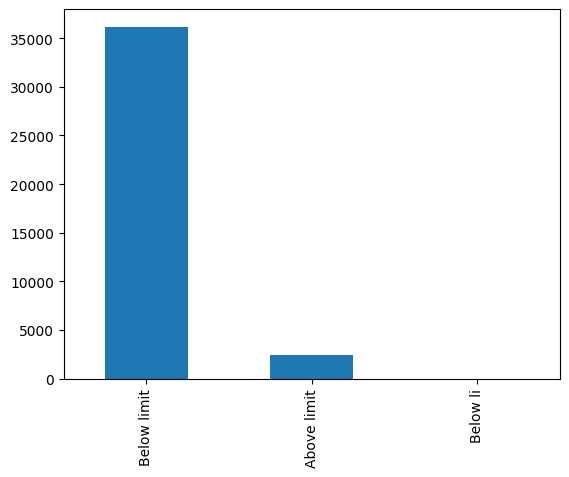

In [14]:
# univariant analaysis
# catagorical data
#sns.countplot(df['income_above_limit'])
df['income_above_limit'].value_counts().plot(kind='bar')

(array([ 9810., 12913.,  1533.,  2532.,  1309.,  2324.,  5757.,   150.,
         1384.,   901.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

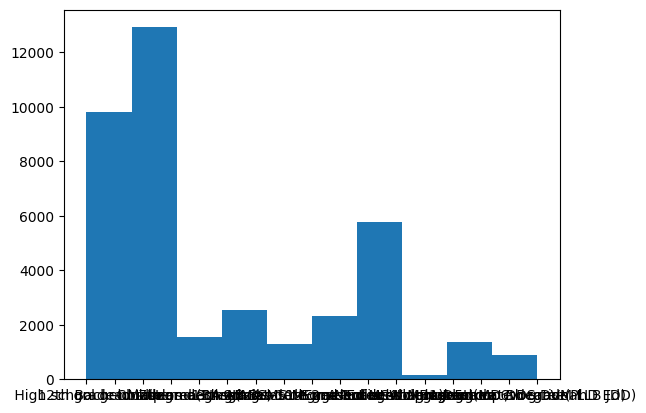

In [15]:
plt.hist(df['education'])

<Axes: ylabel='gender'>

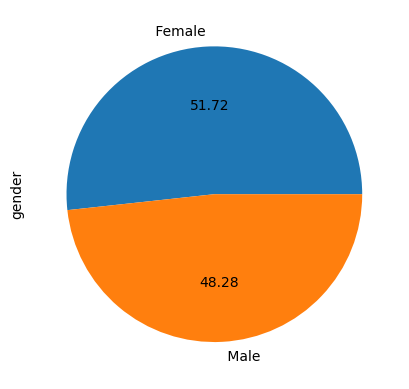

In [16]:
df['gender'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='age', ylabel='Count'>

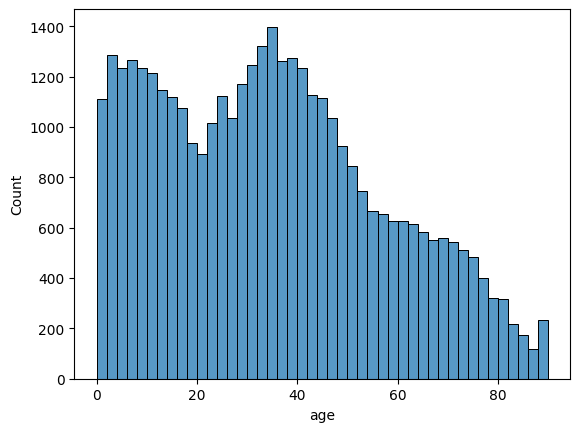

In [17]:
sns.histplot(df['age'])

<Axes: ylabel='marital_status'>

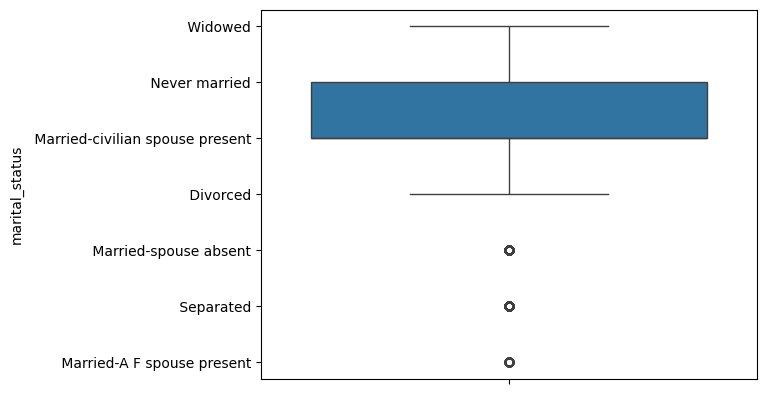

In [ ]:
sns.boxplot(df['marital_status'])

<ipython-input-21-4116d419a204>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gains'], hist=False)


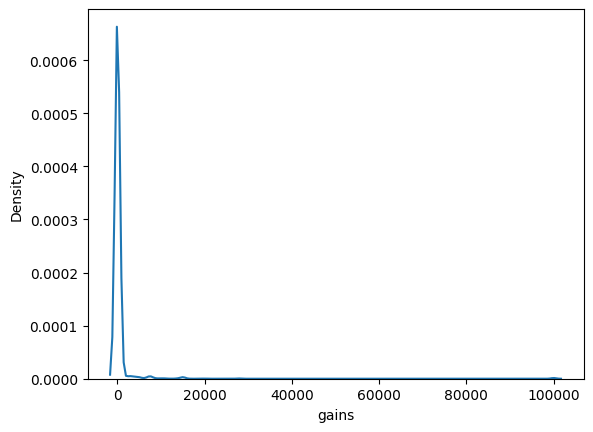

In [21]:
sns.distplot(df['gains'], hist=False)
plt.show()

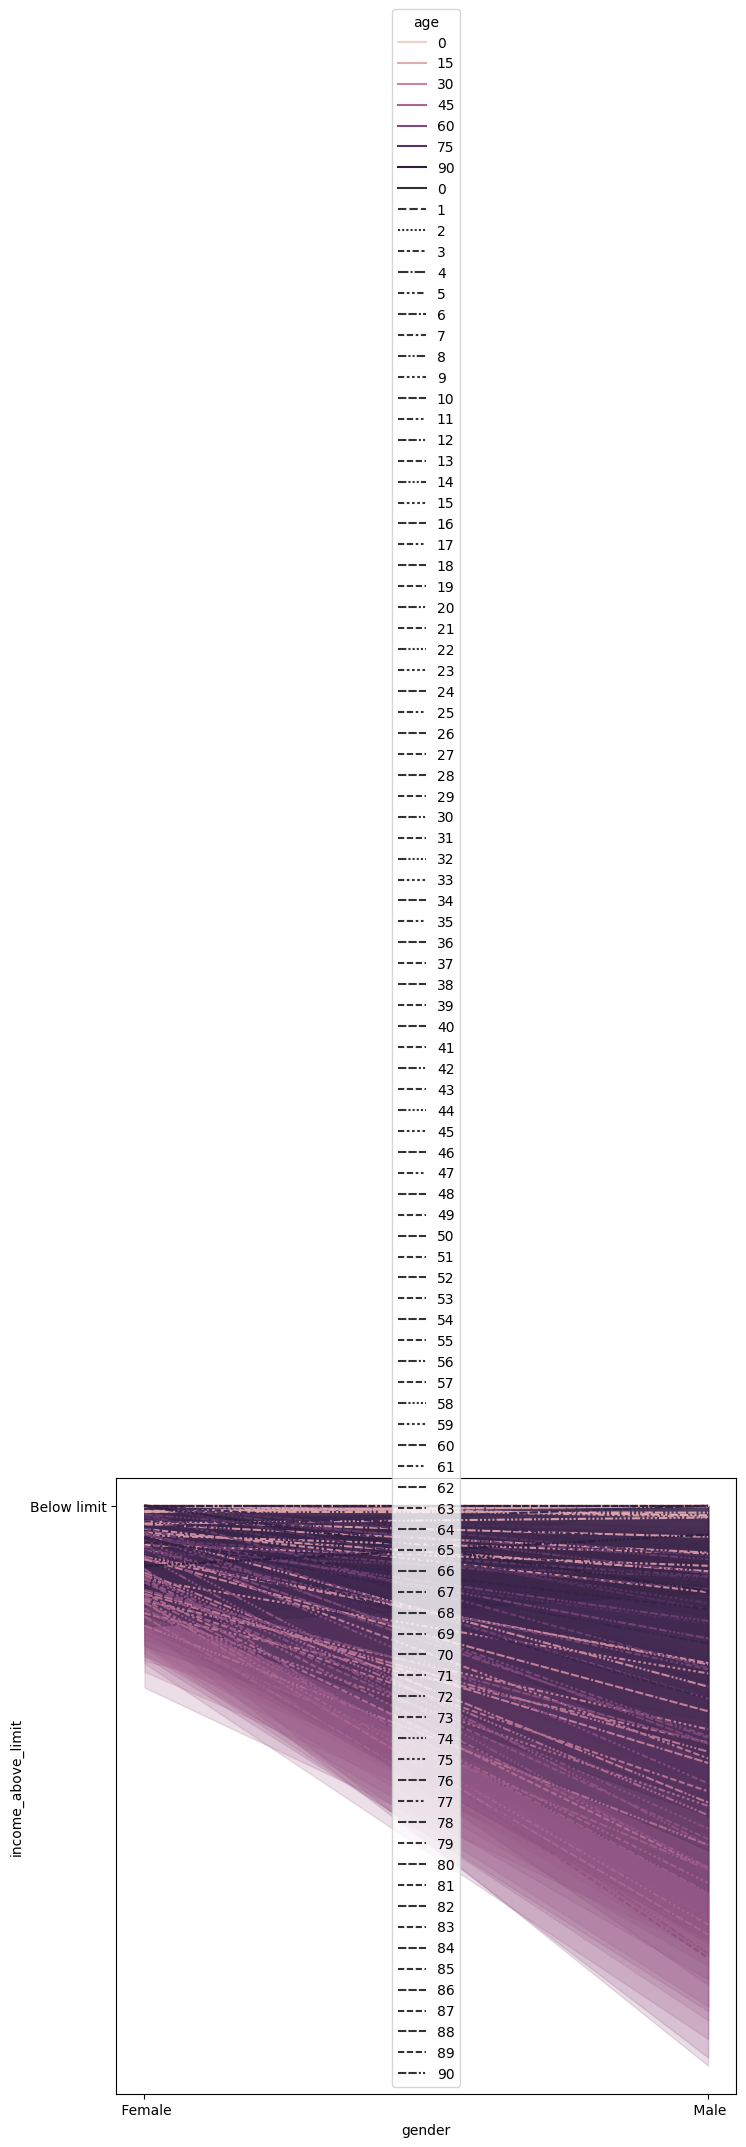

In [31]:
plt.figure(figsize=(8,8))
sns.lineplot(x="gender", y="income_above_limit", hue="age", style="age", data=df)
plt.show()

In [ ]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

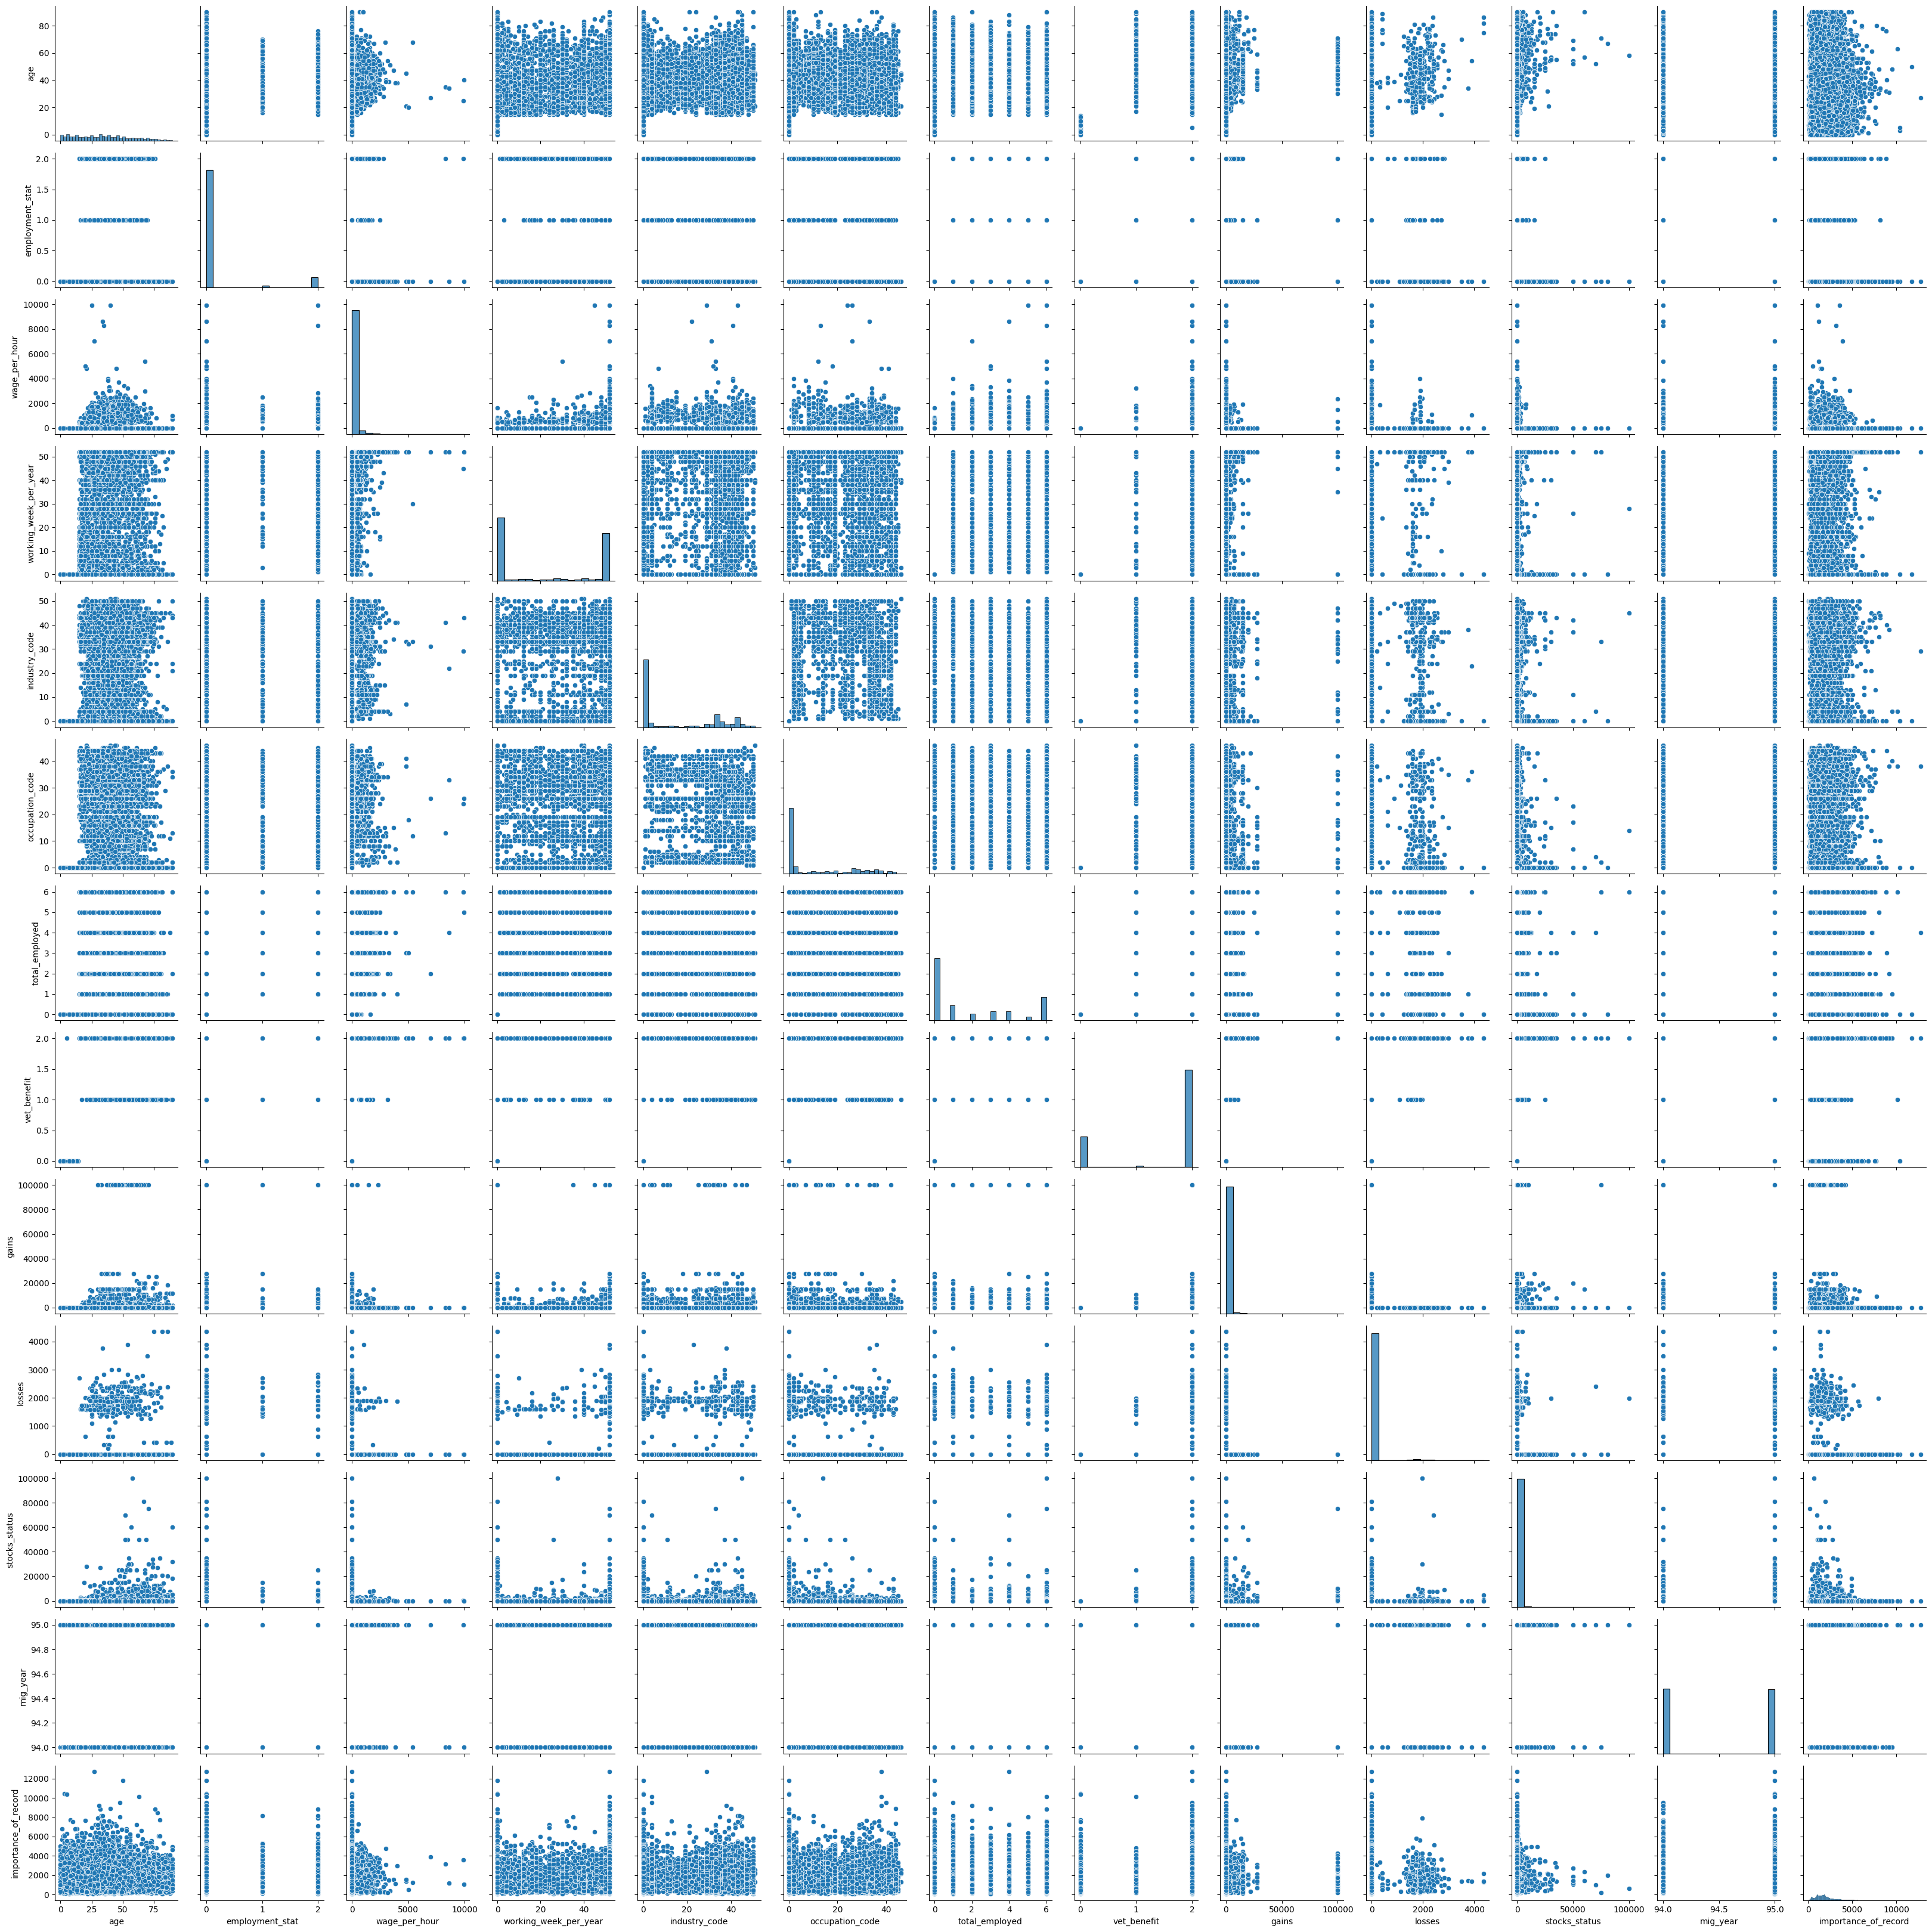

In [ ]:
sns.pairplot(df[['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit']])
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-32-25b451b0a716>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")


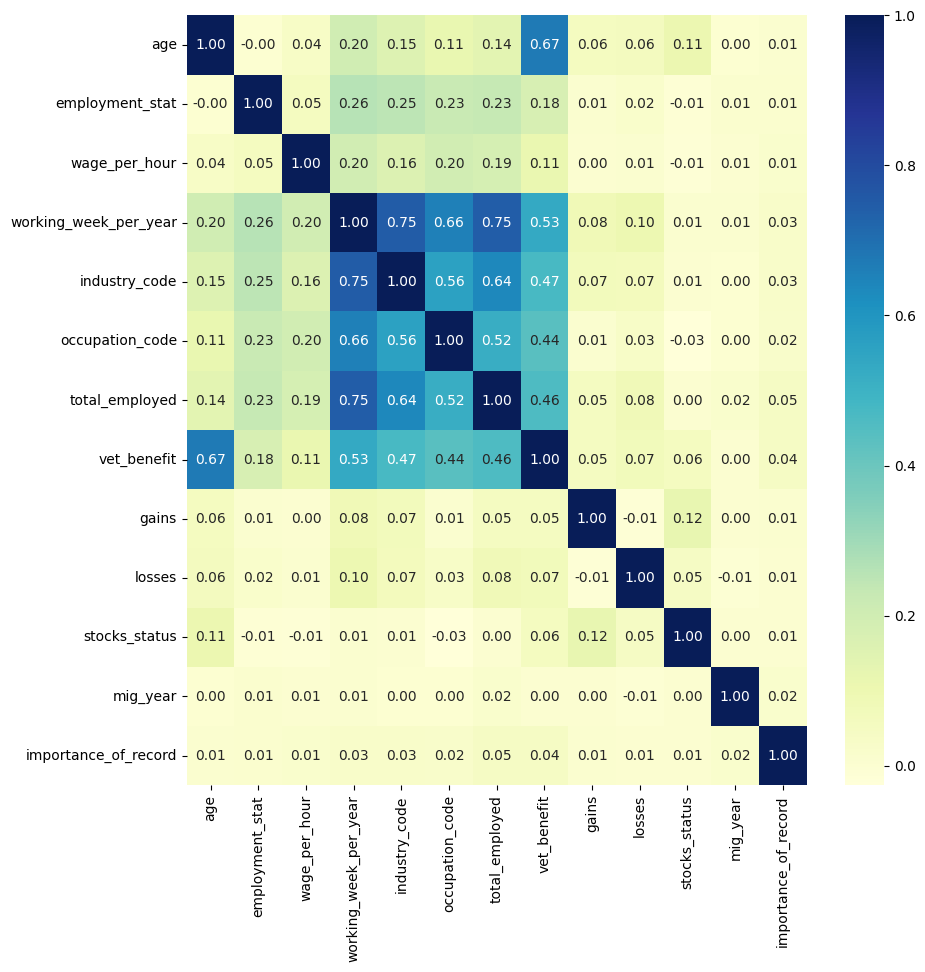

In [32]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [33]:
columns_to_drop = ['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main','under_18_family','country_of_birth_father','country_of_birth_mother','migration_prev_sunbelt','veterans_admin_questionnaire','old_residence_state','old_residence_reg','migration_prev_sunbelt','residence_1_year_ago','migration_code_move_within_reg','migration_code_change_in_reg']  # Example list of columns to drop

# Dropping columns
df.drop(columns=columns_to_drop, inplace=True)

In [34]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'migration_code_change_in_msa',
       'importance_of_record', 'income_above_limit'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38613 entries, 0 to 38612
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            38613 non-null  object 
 1   age                           38613 non-null  int64  
 2   gender                        38613 non-null  object 
 3   education                     38613 non-null  object 
 4   marital_status                38613 non-null  object 
 5   race                          38613 non-null  object 
 6   is_hispanic                   38613 non-null  object 
 7   employment_commitment         38613 non-null  object 
 8   employment_stat               38613 non-null  int64  
 9   wage_per_hour                 38613 non-null  int64  
 10  working_week_per_year         38613 non-null  int64  
 11  industry_code                 38613 non-null  int64  
 12  industry_code_main            38613 non-null  object 
 13  o

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputed_data = imputer.fit_transform(df)

imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(df)

# Forward fill
df_filled = df.fillna(method='ffill')

# Backward fill
df_filled = df.fillna(method='bfill')

In [38]:
df.dropna(inplace = True)

In [40]:
# Identify categorical features
df.select_dtypes(['category']).columns

Index([], dtype='object')

In [67]:
# Convert categorical variables into 'dummy' or indicator variables
id = pd.get_dummies(['ID'], drop_first = True) # drop_first prevents multi-collinearity
gender = pd.get_dummies(['gender'], drop_first = True)
education = pd.get_dummies(['education'], drop_first = True)
marital_status = pd.get_dummies(['marital_status'], drop_first = True)
race  = pd.get_dummies(['race'], drop_first = True)
is_hispanic= pd.get_dummies(['is_hispanic'], drop_first = True)
employment_commitment= pd.get_dummies(['employment_commitment'], drop_first = True)
industry_code_main= pd.get_dummies(['industry_code_main'], drop_first = True)
household_stat = pd.get_dummies(['household_stat'], drop_first = True)
household_summary = pd.get_dummies(['household_summary'], drop_first = True)
tax_status = pd.get_dummies(['tax_status'], drop_first = True)
citizenship = pd.get_dummies(['citizenship'], drop_first = True)
country_of_birth_own = pd.get_dummies(['country_of_birth_own'], drop_first = True)
migration_code_change_in_msa = pd.get_dummies(['migration_code_change_in_msa'], drop_first = True)
income_above_limit = pd.get_dummies(['income_above_limit'], drop_first = True)
importance_of_record = pd.get_dummies(['importance_of_record'])

In [68]:
# Add new dummy columns to data frame
full_data = pd.concat([df,id, gender,education,marital_status, race,is_hispanic, employment_commitment, industry_code_main, household_stat, household_summary, tax_status, citizenship, country_of_birth_own, migration_code_change_in_msa, income_above_limit, importance_of_record], axis = 1)
full_data.head(5)

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,importance_of_record,income_above_limit,importance_of_record
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,0,0,292,Native,95,US,?,1779.74,Below limit,1.0
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,unchanged,2366.75,Below limit,NaN
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,0,0,0,Native,94,US,unchanged,1693.42,Below limit,NaN
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,unchanged,1380.27,Below limit,NaN
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,?,1580.79,Below limit,NaN


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X is your feature matrix and contains both numeric and non-numeric columns
# Define columns with numeric and non-numeric data
numeric_features = ['age', 'employment_stat', 'working_week_per_year', 'wage_per_hour', 'industry_code', 'occupation_code', 'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']
non_numeric_features = ['ID', 'gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment']

# Define preprocessing steps for numeric and non-numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

# Apply preprocessing steps to respective columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', non_numeric_transformer, non_numeric_features)])

# Fit the preprocessor to your data
pre_process = preprocessor.fit(X)

# Transform your data
X_transform = pre_process.transform(X)



In [70]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [71]:
x_train.shape
x_train

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,importance_of_record
2481,ID_TZ101333,24,Male,11th grade,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,2,718,...,1,Single,0,0,0,Native,94,US,MSA to MSA,2822.91
1284,ID_TZ100255,44,Male,High school graduate,Never married,White,All other,Children or Armed Forces,0,0,...,2,Single,0,0,0,Native,94,US,unchanged,2939.95
28559,ID_TZ124827,47,Female,10th grade,Widowed,Black,All other,Not in labor force,0,0,...,2,Nonfiler,0,0,0,Native,95,US,?,1475.53
34231,ID_TZ129937,66,Female,10th grade,Married-civilian spouse present,Black,All other,Children or Armed Forces,0,0,...,2,Joint both 65+,0,0,0,Native,94,US,unchanged,1429.95
17431,ID_TZ114801,4,Male,Children,Never married,White,Central or South American,Children or Armed Forces,0,0,...,0,Nonfiler,0,0,0,Native,95,US,?,1157.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,ID_TZ110310,4,Female,Children,Never married,White,Mexican-American,Children or Armed Forces,0,0,...,0,Nonfiler,0,0,0,Native,94,US,unchanged,1361.43
5739,ID_TZ104269,31,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,2,Joint both under 65,0,1977,0,Native,94,US,MSA to MSA,1190.94
8065,ID_TZ106364,5,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,...,0,Nonfiler,0,0,0,Native,94,US,unchanged,1484.96
17859,ID_TZ115188,41,Female,High school graduate,Married-civilian spouse present,White,All other,Full-time schedules,0,0,...,2,Joint both under 65,0,0,0,Native,95,US,?,4962.70


In [72]:
# y_train.shape
y_train

2481     Below limit
1284     Above limit
28559    Below limit
34231    Below limit
17431    Below limit
            ...     
12446    Below limit
5739     Above limit
8065     Below limit
17859    Below limit
18047    Below limit
Name: income_above_limit, Length: 30657, dtype: object

In [73]:
x_test.shape
x_test

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,migration_code_change_in_msa,importance_of_record
25922,ID_TZ122451,40,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,2,Joint both under 65,0,0,0,Native,94,US,unchanged,1227.10
23570,ID_TZ120332,11,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,...,0,Nonfiler,0,0,0,Native,95,US,?,975.67
8361,ID_TZ106630,28,Female,Some college but no degree,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,...,2,Joint both under 65,0,0,0,Native- Born in Puerto Rico or U S Outlying,94,Puerto-Rico,unchanged,637.31
36529,ID_TZ132007,9,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,...,0,Nonfiler,0,0,0,Native,94,US,unchanged,2194.03
13046,ID_TZ110851,25,Male,5th or 6th grade,Never married,White,Mexican-American,Children or Armed Forces,0,0,...,2,Single,0,0,0,Foreign born- Not a citizen of U S,94,Mexico,MSA to MSA,6916.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8012,ID_TZ106316,5,Male,Children,Never married,Other,Mexican (Mexicano),Children or Armed Forces,0,0,...,0,Nonfiler,0,0,0,Native,95,US,?,1485.97
28818,ID_TZ125060,51,Male,Less than 1st grade,Never married,Black,NA,Children or Armed Forces,0,0,...,2,Nonfiler,0,0,0,Native,94,US,unchanged,8948.72
27077,ID_TZ123492,50,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,2,Joint both under 65,0,0,0,Native,94,US,unchanged,888.98
31074,ID_TZ127093,28,Female,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,2,Joint both under 65,0,0,0,Native,94,US,unchanged,4755.49


In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_train = x_train.apply(le.fit_transform)

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x_test = x_test.apply(le.fit_transform)

## 1. logistic regression

# Model Training

In [86]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [87]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 94.17 %


# 2. decision Tree

# Model Training

In [88]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

# Model Evaluation

In [89]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 91.79 %


# 3. Randon Forest

# Mode Training

In [90]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

# Model Evaluation

In [91]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 94.6 %


# 4. Gradient Bossting classifier

# Model Training

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

# Model Evaluation

In [93]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 95.23 %


In [94]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 95.23
2. Random Forest Classifier: 94.6
3. Logistic Regression: 94.17
4. Decision Tree Classifier: 91.79
